# Linear Models

Principle : Linear models make a prediction using a linear function of the input features. Each feature is assigned a weight learned by the algorithm.
There are many different linear models for classification. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled. The two most common algorithms are *logistic regression* (despites its name) and *linear support vector machines*.
For both of them, the regularization parameter C can be adjusted to get better results. The higher the value, the most the algorithm is gonna give importance to every points for the dataset trying to fit as most as possible to the training set. Using low values means the algorithm is gonna try to adjust to the "majority" of the points.

### Set up

First import all necessary packages in order not to worry about them when testing new parameters/algorithms:

In [6]:
%load_ext autoreload
%autoreload
from LinearModels import display_plot_logreg, display_plot_svc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Logistic Regression

### First test

Let's try the logistic regression first with C set to the default value 1, then C=100 and eventually C=0.01.

In [9]:
gt = pd.read_csv('../dumps/2020.01.13-14.25.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

logreg = LogisticRegression(max_iter=100000).fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg.score(data_test, target_test)))

Training set score: 0.839
Test set score: 0.774


In [10]:
logreg100 = LogisticRegression(C=100,max_iter=100000).fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg100.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg100.score(data_test, target_test)))

Training set score: 0.839
Test set score: 0.779


In [11]:
logreg001 = LogisticRegression(C=0.01,max_iter=100000).fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg001.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg001.score(data_test, target_test)))

Training set score: 0.838
Test set score: 0.779


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Intersting to notice that here to values are always quite similar. We should maybe try with more iterations as stated in the erros messages.
We can also add L1 regularization to limit the number of features and see how it goes.

### Further tests

#### Regularization parameter

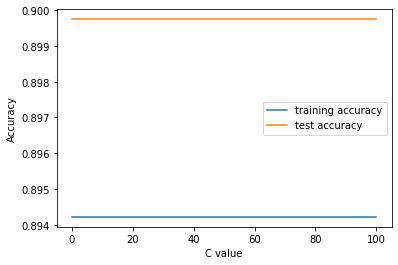

In [24]:
display_plot_logreg('../dumps/2020.02.10-12.14.csv',0.20,0.01,100)

### Best match

In [12]:
gt = pd.read_csv('../dumps/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

In [13]:
parameters = {'C': [0.01,0.1, 1, 10, 100], 'max_iter':[100,1000,10000]}
clf = GridSearchCV(LogisticRegression(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)

0.8942172073342737
{'C': 0.01, 'max_iter': 100}
0.899749373433584
{'C': 0.01, 'max_iter': 100}


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
parameters = {'C': [0.01,0.1, 1, 10, 100], 'max_iter':[100,1000,10000]}
clf = RandomizedSearchCV(LogisticRegression(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)

0.8942172073342737
{'max_iter': 100, 'C': 1}
0.899749373433584
{'max_iter': 100, 'C': 1}


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Linear SVC

### First test

Same procedure as done before with logistic regression where a first test is made with C value set to 1, 100 and 0.01.

In [12]:
linsvc = LinearSVC(max_iter=100000).fit(data_train, target_train)
print("Training set score: {:.3f}".format(linsvc.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(linsvc.score(data_test, target_test)))

Training set score: 0.756
Test set score: 0.648


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
linsvc100 = LinearSVC(C=100).fit(data_train, target_train)
print("Training set score: {:.3f}".format(linsvc100.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(linsvc100.score(data_test, target_test)))

Training set score: 0.590
Test set score: 0.548


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
linsvc001 = LinearSVC(C=0.01).fit(data_train, target_train)
print("Training set score: {:.3f}".format(linsvc001.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(linsvc001.score(data_test, target_test)))

Training set score: 0.789
Test set score: 0.759


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Further tests

### Regularization parameter

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


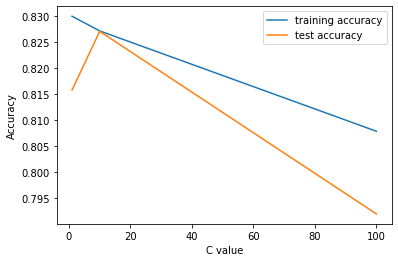

In [15]:
display_plot_svc('../dumps/2020.02.10-12.14.csv',0.20,1,100)

### Best match

In [3]:
gt = pd.read_csv('../dumps/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

In [15]:
parameters = {'C': [0.01,0.1, 1, 10, 100], 'max_iter':[100,1000,10000]}
clf = GridSearchCV(LinearSVC(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)

0.7967403228334117
{'C': 0.01, 'max_iter': 100}
0.7894736842105263
{'C': 0.01, 'max_iter': 100}


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
parameters = {'C': [0.01,0.1, 1, 10, 100], 'max_iter':[100,1000,10000]}
clf = RandomizedSearchCV(LinearSVC(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)

0.7490988873217364
{'max_iter': 1000, 'C': 0.1}
0.7543859649122807
{'max_iter': 1000, 'C': 0.1}


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
